In [1]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay

tf.random.set_seed(0)

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link_dataset='https://drive.google.com/file/d/1MOxn2X-3vMlbZv2J60R56Jm_rZcQTGJ5/view?usp=sharing'
id_file_dataset = link_dataset.split('d/')[1].split('/')[0]
downloaded_dataset = drive.CreateFile({'id': id_file_dataset}) 
downloaded_dataset.GetContentFile('dataset_png.zip') 

In [4]:
!unzip dataset_png.zip

Archive:  dataset_png.zip
   creating: C0_1/
  inflating: __MACOSX/._C0_1         
  inflating: C0_1/C0_bkg1_Event_17.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_17.png  
  inflating: C0_1/C0_bkg1_Event_132.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_132.png  
  inflating: C0_1/C0_bkg1_Event_126.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_126.png  
  inflating: C0_1/C0_bkg1_Event_127.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_127.png  
  inflating: C0_1/C0_bkg1_Event_133.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_133.png  
  inflating: C0_1/C0_bkg1_Event_16.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_16.png  
  inflating: C0_1/C0_bkg1_Event_8.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_8.png  
  inflating: C0_1/C0_bkg1_Event_28.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_28.png  
  inflating: C0_1/C0_bkg1_Event_14.png  
  inflating: __MACOSX/C0_1/._C0_bkg1_Event_14.png  
  inflating: C0_1/C0_bkg1_Event_119.png  
  inflating: __MACOSX/C0_1/._C0_

In [5]:
class_0_folders = [ 'C0_1','C0_2','C0_3']
class_1_folders = [ 'C1_1','C1_2','C1_3']

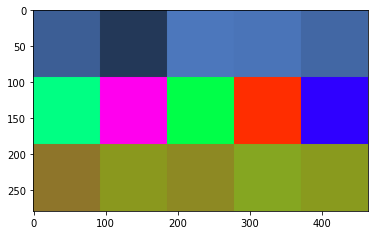

In [7]:
example_path='C0_1/C0_bkg1_Event_2.png'
img=cv2.imread(example_path)
plt.imshow(img)

In [8]:
import os
import cv2
import numpy as np

y=[]
x=[]
for folder in class_0_folders:
  l_images = os.listdir(folder)
  for path in l_images:
    image_path = folder+'/'+path
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(np.resize(gray,(96,96)))
    y.append(0)

for folder in class_1_folders:
  l_images = os.listdir(folder)
  for path in l_images:
    img = cv2.imread(folder+'/'+path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(np.resize(gray,(96,96)))
    y.append(1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.15,random_state=3)

In [10]:
x_train[0].shape

(96, 96)

In [12]:
model1 = tf.keras.models.Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96,1)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())

model1.add(Dense(2, activation='softmax'))

In [13]:
model1.summary()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 92, 92, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 67712)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 135426    
                                                                 
Total params: 144,994
Trainable params: 144,994
Non-trainable params: 0
________________________________________________

In [14]:
model1.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history = model1.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
32/32 [==============================] - 12s 27ms/step - loss: 63.9676 - accuracy: 0.5412 - val_loss: 0.6876 - val_accuracy: 0.5111
Epoch 2/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6922 - accuracy: 0.5049 - val_loss: 0.6890 - val_accuracy: 0.5167
Epoch 3/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6918 - accuracy: 0.5049 - val_loss: 0.6893 - val_accuracy: 0.5167
Epoch 4/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6912 - accuracy: 0.5069 - val_loss: 0.6873 - val_accuracy: 0.5167
Epoch 5/20
32/32 [==============================] - 0s 15ms/step - loss: 0.6904 - accuracy: 0.5088 - val_loss: 0.6871 - val_accuracy: 0.5167
Epoch 6/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6894 - accuracy: 0.5167 - val_loss: 0.6930 - val_accuracy: 0.5167
Epoch 7/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6877 - accuracy: 0.5206 - val_loss: 0.6952 - val_accuracy: 0.5167
Epoch 8/20


6/6 - 0s - loss: 0.7136 - accuracy: 0.5111 - 51ms/epoch - 8ms/step


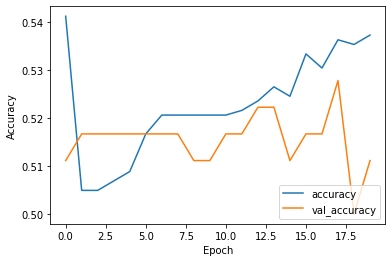

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

Matriz de confusion para el conujunto de validacion


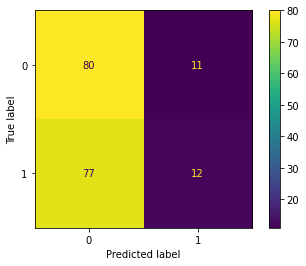

In [16]:
print('Matriz de confusion para el conujunto de validacion')
cm=confusion_matrix(y_test,np.argmax(model1.predict(x_test),axis=1))
cm_display = ConfusionMatrixDisplay(cm).plot()